<a href="https://colab.research.google.com/github/AeroEng16/FootballAnalysis/blob/main/lineDetectionAndHomography.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive',force_remount=True)


Mounted at /content/drive


In [12]:
import cv2
from google.colab.patches import cv2_imshow
import numpy as np

In [4]:
vid = cv2.VideoCapture("/content/drive/MyDrive/ML/FootballAnalysis/08fd33_4.mp4")

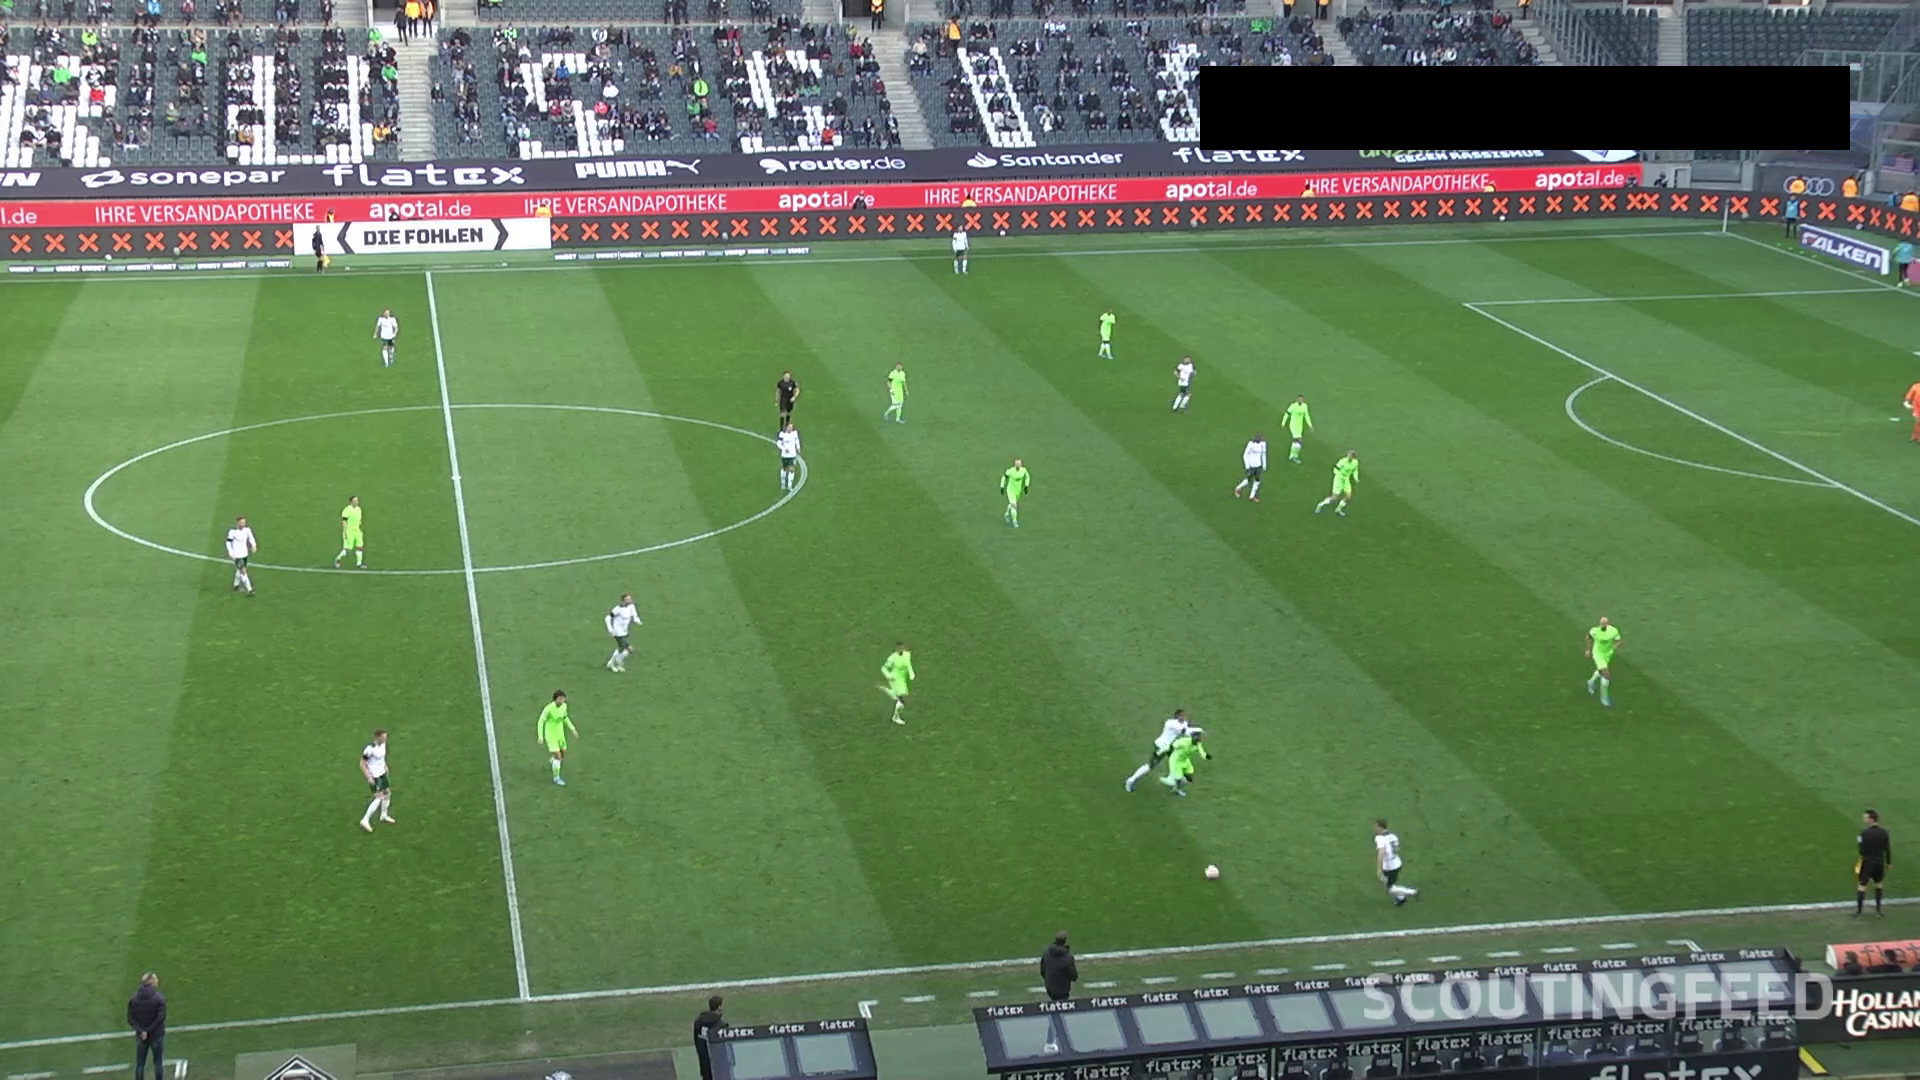

In [10]:
ret, frame = vid.read()

cv2_imshow(frame)

In [15]:
hsv = cv2.cvtColor(frame, cv2.COLOR_RGB2HSV)
mask_green = cv2.inRange(hsv, (36, 25, 25), (86, 255, 255)) # green mask to select only the field
frame_masked = cv2.bitwise_and(frame, frame, mask=mask_green)

gray = cv2.cvtColor(frame_masked, cv2.COLOR_RGB2GRAY)
_, thresh = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY)
lsd=cv2.createLineSegmentDetector(0)
canny = cv2.Canny(gray, 50, 150, apertureSize=3)
# Hough line detection
lines = cv2.HoughLinesP(canny, 1, np.pi / 180, 50, None, 50, 20)
# Line segment detection
lines_lsd = lsd.detect(canny)[0]

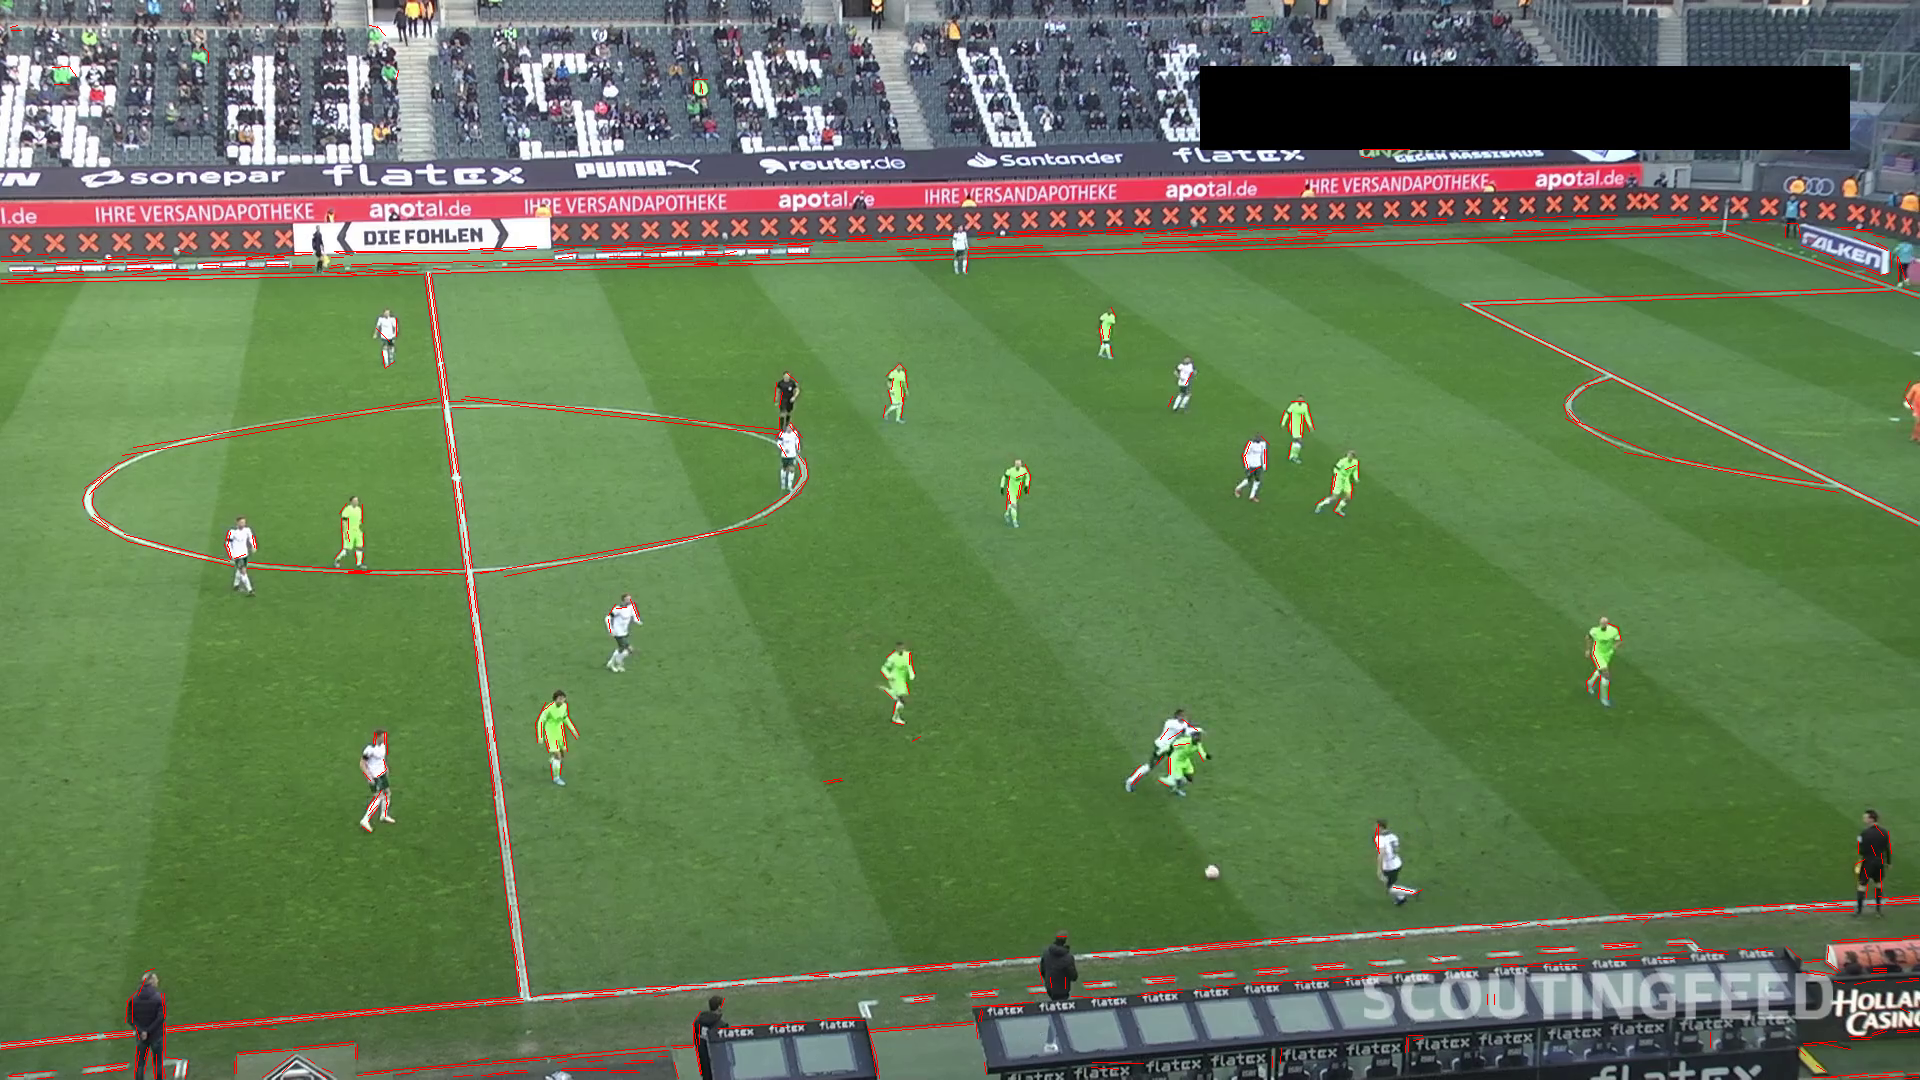

In [17]:
drawn_img = lsd.drawSegments(frame,lines_lsd)
cv2_imshow(drawn_img)